In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
insurance = pd.read_excel('INSURANCE.xlsx', sheet_name='TRAINING')
insurance.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
insurance.drop('Loan_ID', axis=1, inplace=True)

#### Missing Values

In [38]:
null_count = insurance.isnull().sum()

In [39]:
percentage = insurance.isnull().sum()*100/614

In [49]:
pd.concat([null_count, percentage], axis=1, keys=['null_count','percentage']).sort_values(by='percentage',ascending=False)

,null_count,percentage
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


In [66]:
# fill missing `Gender` values with the mode
insurance.Gender.fillna(insurance.Gender.mode()[0],inplace=True)
# fill missing `Married` values with the mode
insurance.Married.fillna(insurance.Married.mode()[0],inplace=True)
# fill missing `Dependents` values with the mode
insurance.Dependents.fillna(insurance.Dependents.mode()[0],inplace=True)
# fill missing `Self_Employed` values with the mode
insurance.Self_Employed.fillna(insurance.Self_Employed.mode()[0],inplace=True)
# fill missing `LoanAmount` values with the median
insurance.LoanAmount.fillna(insurance.LoanAmount.median(),inplace=True)
# fill missing `Loan_Amount_Term` values with the mode
insurance.Loan_Amount_Term.fillna(insurance.Loan_Amount_Term.mode()[0],inplace=True)
# fill missing `Credit_History` values with the mode
insurance.Credit_History.fillna(insurance.Credit_History.mode()[0],inplace=True)

In [67]:
insurance.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [68]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [80]:
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [72]:
code_numeric = {
    'Male':1,
    'Female':0,
    'Graduate':1,
    'Not Graduate':0,
    'Yes':1,
    'No':0,
    'Rural':0,
    'Semiurban':1,
    'Urban':2,
    'Y':1,
    'N':0
}

In [78]:
insurance = insurance.applymap(lambda x: code_numeric.get(x) if x in code_numeric else x)

In [79]:
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1


<AxesSubplot:>

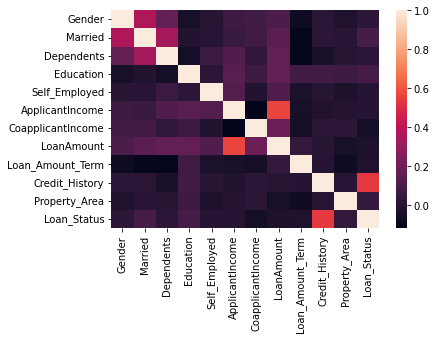

In [82]:
sns.heatmap(insurance.corr())

#### X and Y

In [83]:
X = insurance.drop('Loan_Status', axis=1)
y = insurance['Loan_Status']

In [86]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64